# **Init**

In [153]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

mall_customers = pd.read_csv('Mall_Customers.csv')
scaler = StandardScaler()

age = mall_customers['Age']
income = mall_customers['Annual Income (k$)']
spending_score = mall_customers['Spending Score (1-100)']


income_spending_score = pd.DataFrame({'Income': income, 'Spending Score': spending_score})
age_spending_score = pd.DataFrame({'Age': age, 'Spending Score': spending_score})
income_age = pd.DataFrame({'Income': income, 'Age': age})

# list of param (tuple : eps, min_sample)
params = [
    (0.1, 5),
    (0.2, 5),
    (0.4, 4),
    (0.5, 5),
    (0.5, 10),
    (0.7, 5),
    (0.7, 10),
    (1.0, 5),
    (1.0, 15),
    (0.2, 2),
    (0.5, 3)
]

# **A. Pengelompokan Dataset Mall_Customers.csv dengan DBSCAN**

##**income VS spending_score**

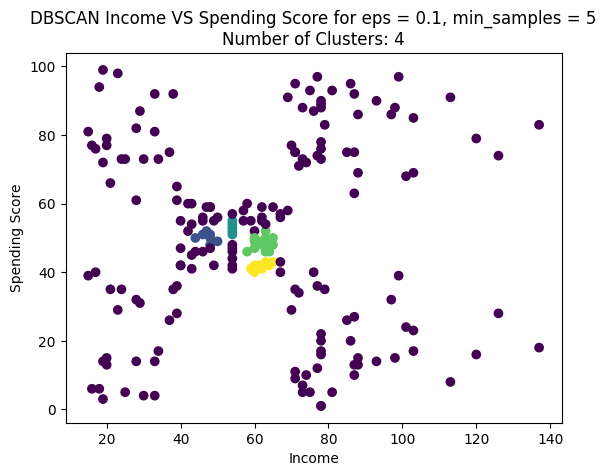

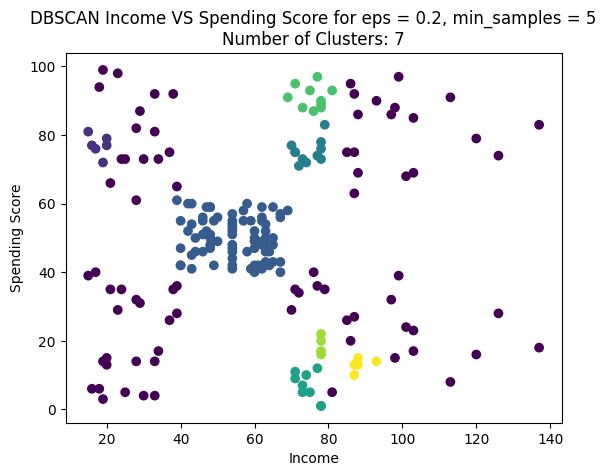

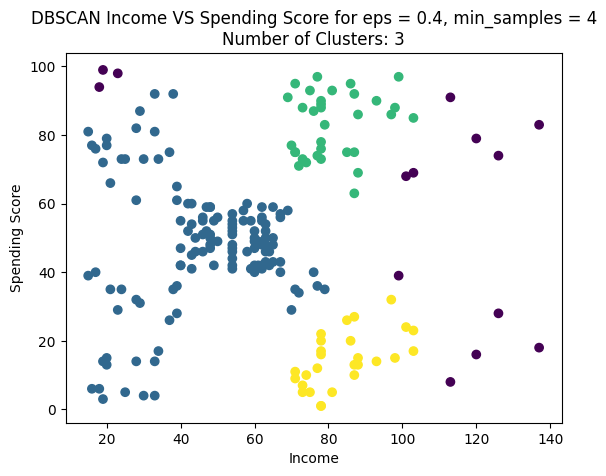

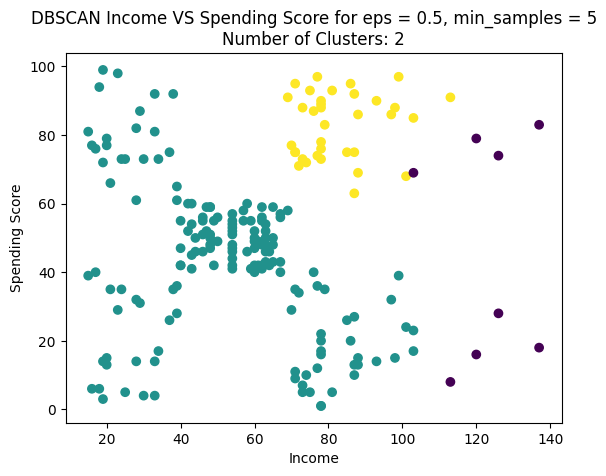

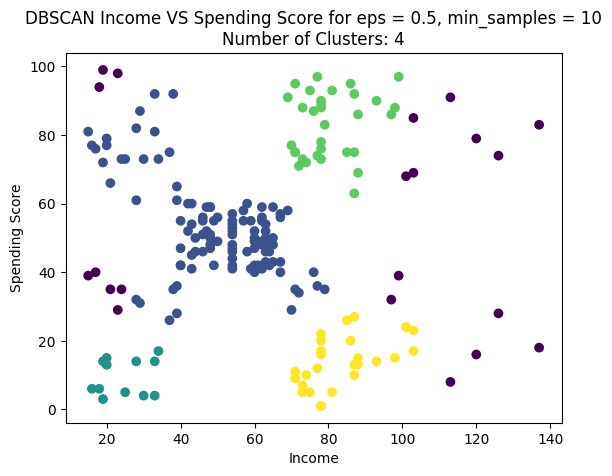

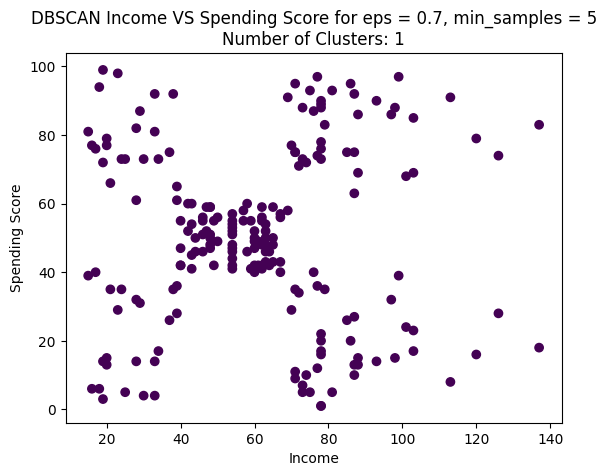

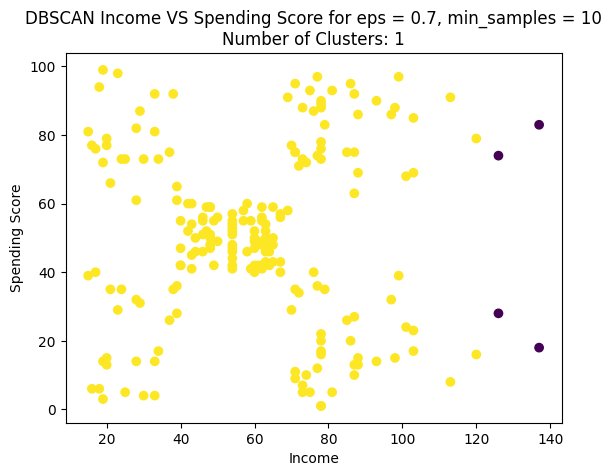

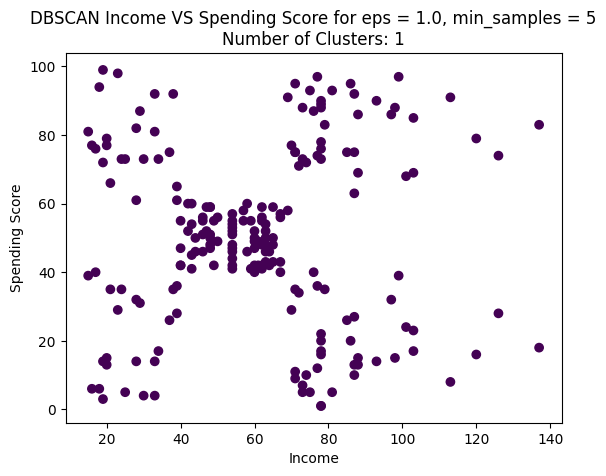

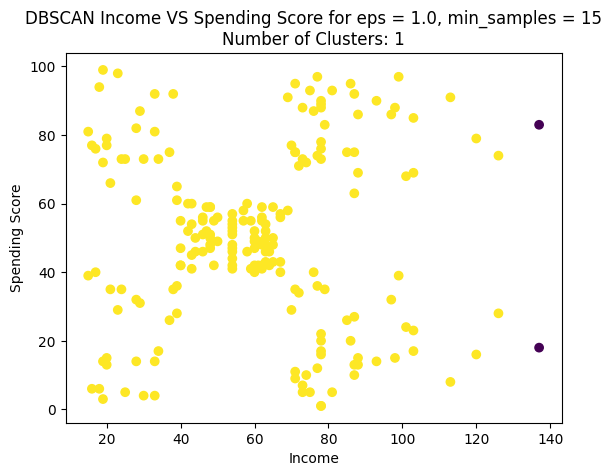

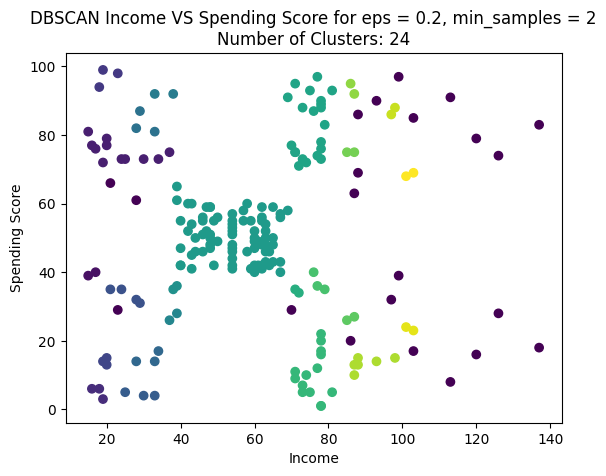

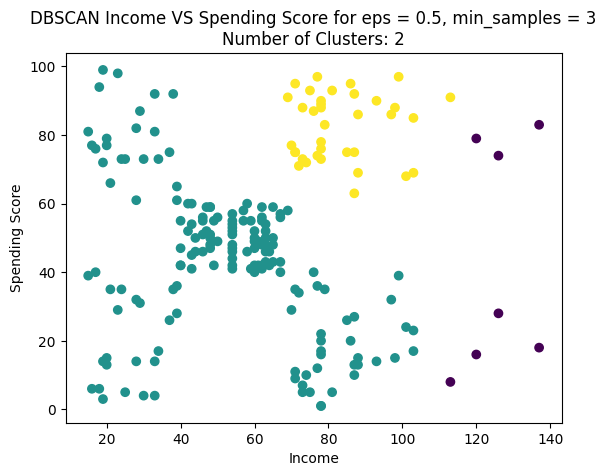

In [154]:
data = income_spending_score.copy()
data_scaled = scaler.fit_transform(data)

silhouette_scores = []
num_clusters = []

for (eps, min_samples) in params:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data_scaled)

    data['Cluster'] = clusters
    num_cluster = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise (if -1 in clusters)

    plt.scatter(data[data.columns[0]], data[data.columns[1]], c=data['Cluster'])
    plt.title(f'DBSCAN {data.columns[0]} VS {data.columns[1]} for eps = {eps}, min_samples = {min_samples}\nNumber of Clusters: {num_cluster}')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.show()

    # No silhouette score calculation if cluster < 1
    if num_cluster > 1:
        silhouette_avg = silhouette_score(data_scaled, clusters)
    else:
        silhouette_avg = -1

    silhouette_scores.append(silhouette_avg)
    num_clusters.append(num_cluster)

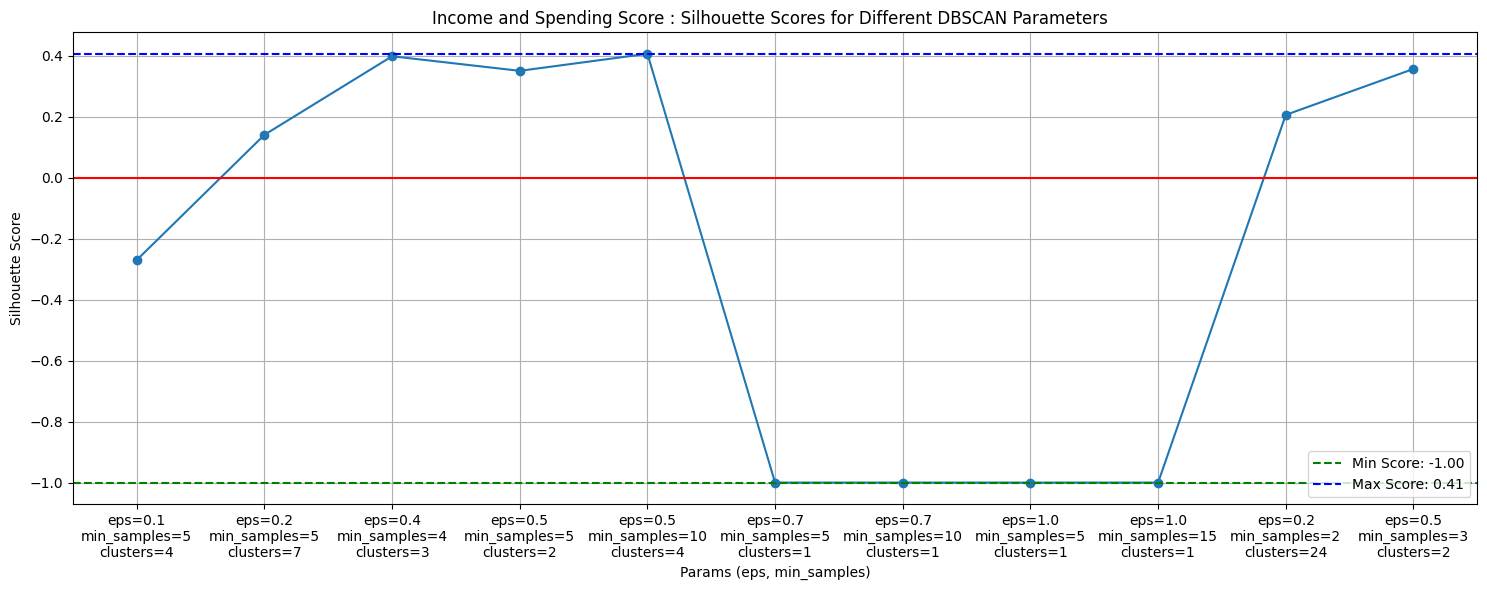

In [155]:
plt.figure(figsize=(15, 6))
plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o')
plt.xticks(range(len(silhouette_scores)),
           [f'eps={eps}\nmin_samples={min_samples}\nclusters={num_clusters}'
            for (eps, min_samples), num_clusters in zip(params, num_clusters)])

plt.title(f'{data.columns[0]} and {data.columns[1]} : Silhouette Scores for Different DBSCAN Parameters  ')
plt.xlabel('Params (eps, min_samples)')
plt.ylabel('Silhouette Score')
min_y = min(silhouette_scores)
max_y = max(silhouette_scores)
plt.axhline(y=0, color='r')
plt.axhline(y=min_y, color='g', linestyle='--', label=f'Min Score: {min_y:.2f}')
plt.axhline(y=max_y, color='b', linestyle='--', label=f'Max Score: {max_y:.2f}')
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

**Kesimpulan** : Untuk pasangan atribut ini, nilai param terbaik adalah eps = **0.5**dan min samples =**10**yang mendapatkan kluster sebanyak **4**. Hal ini didapat dengan menghitung nilai koef siluetny = **0.41**

##**age VS spending_score**

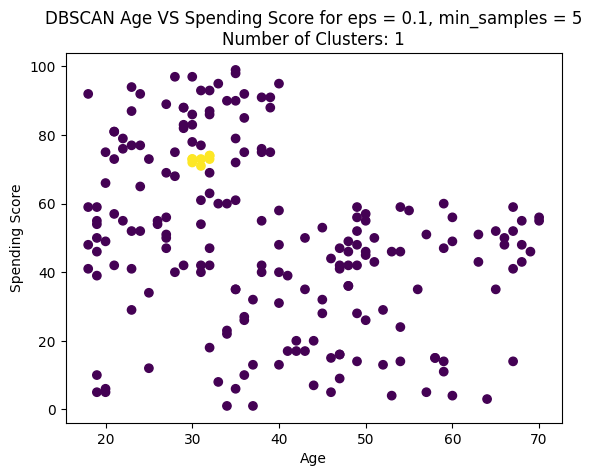

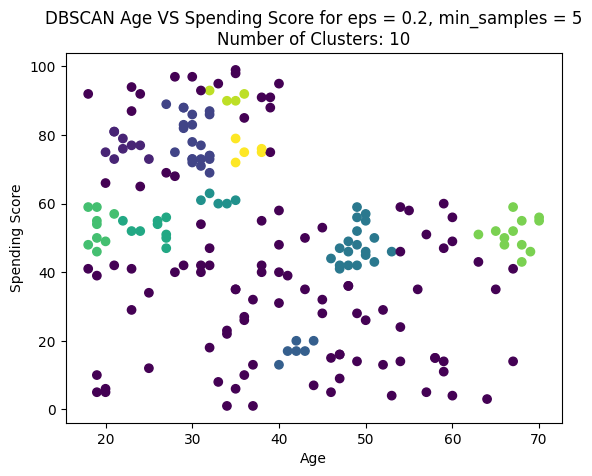

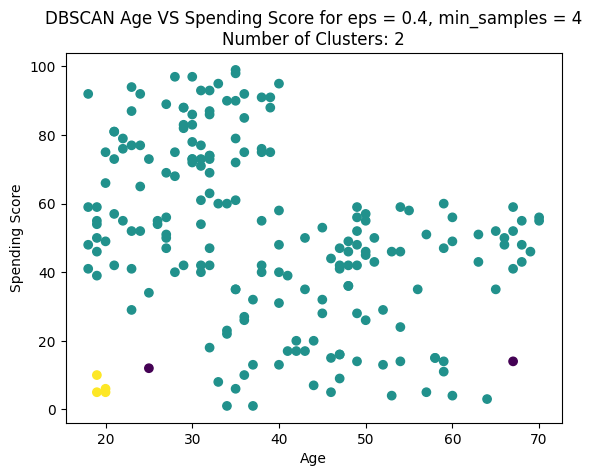

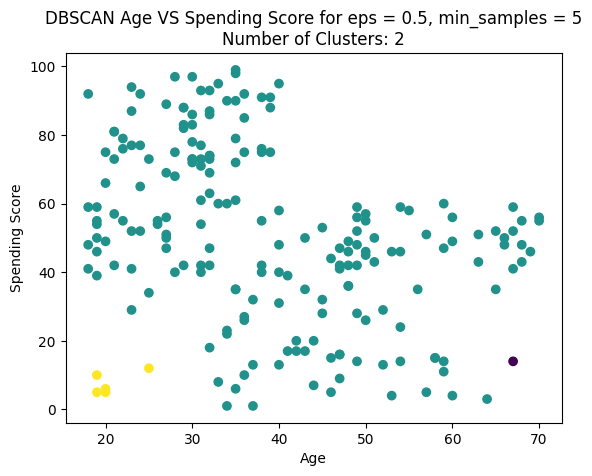

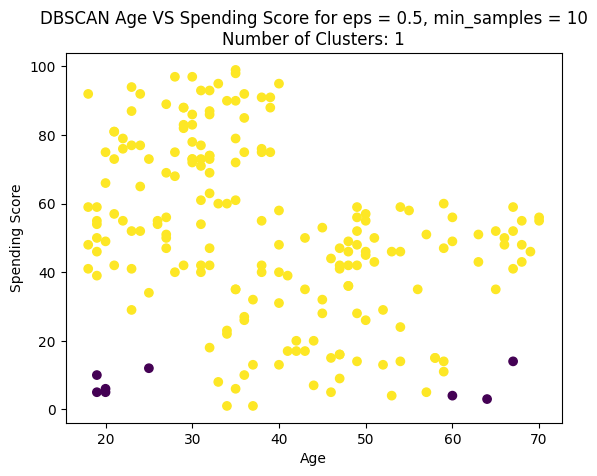

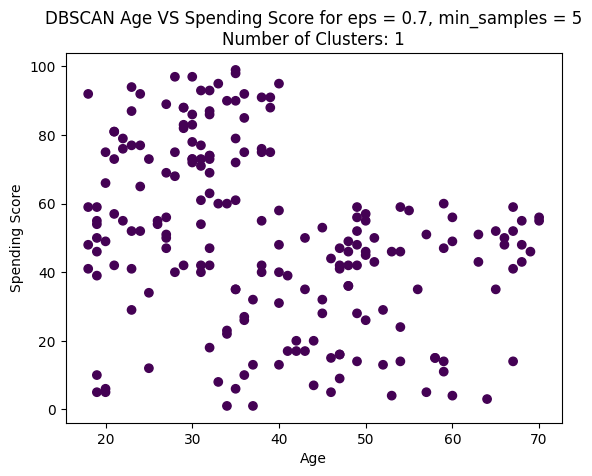

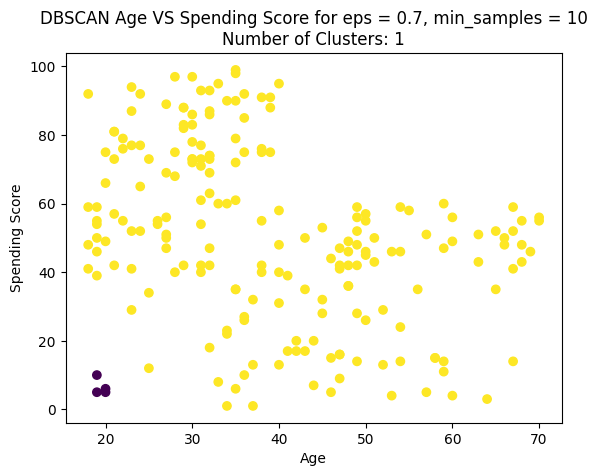

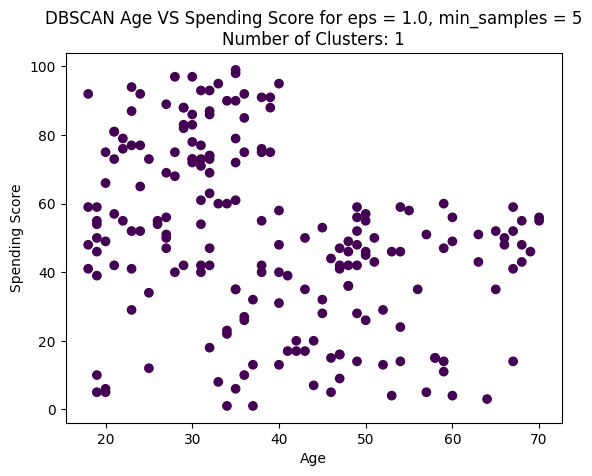

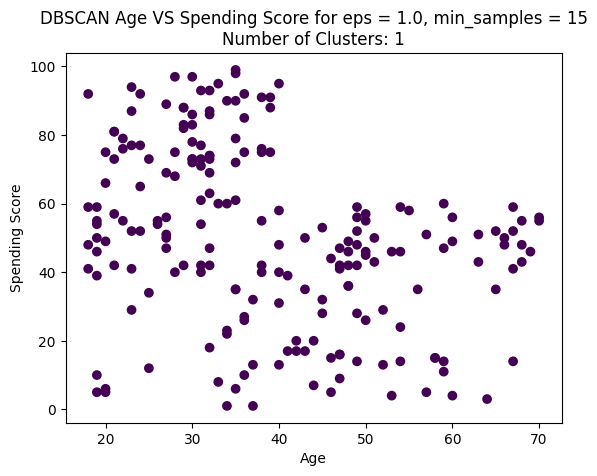

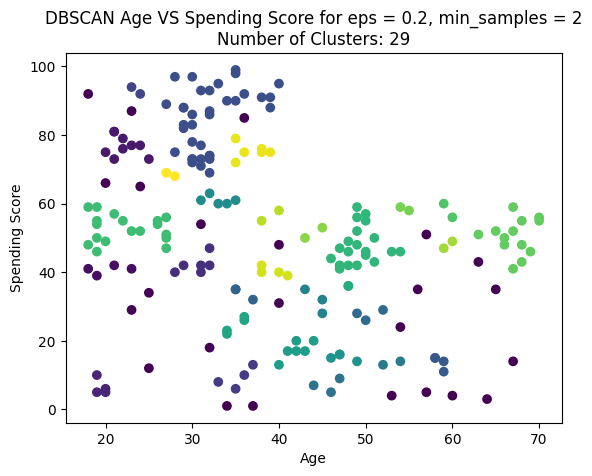

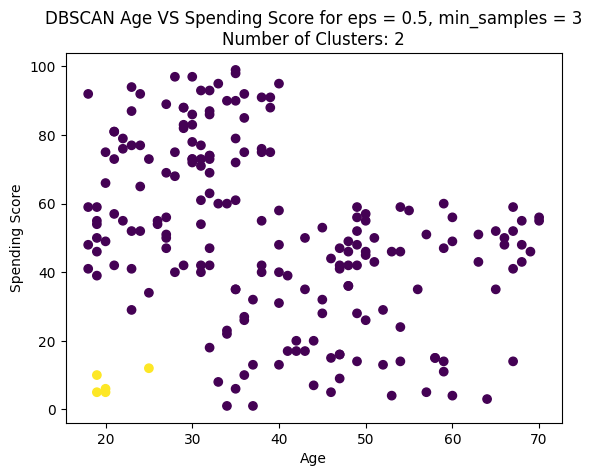

In [156]:
data = age_spending_score.copy()
data_scaled = scaler.fit_transform(data)

silhouette_scores = []
num_clusters = []

for (eps, min_samples) in params:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data_scaled)

    data['Cluster'] = clusters
    num_cluster = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise (if -1 in clusters)

    plt.scatter(data[data.columns[0]], data[data.columns[1]], c=data['Cluster'])
    plt.title(f'DBSCAN {data.columns[0]} VS {data.columns[1]} for eps = {eps}, min_samples = {min_samples}\nNumber of Clusters: {num_cluster}')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.show()

    # No silhouette score calculation if cluster < 1
    if num_cluster > 1:
        silhouette_avg = silhouette_score(data_scaled, clusters)
    else:
        silhouette_avg = -1

    silhouette_scores.append(silhouette_avg)
    num_clusters.append(num_cluster)

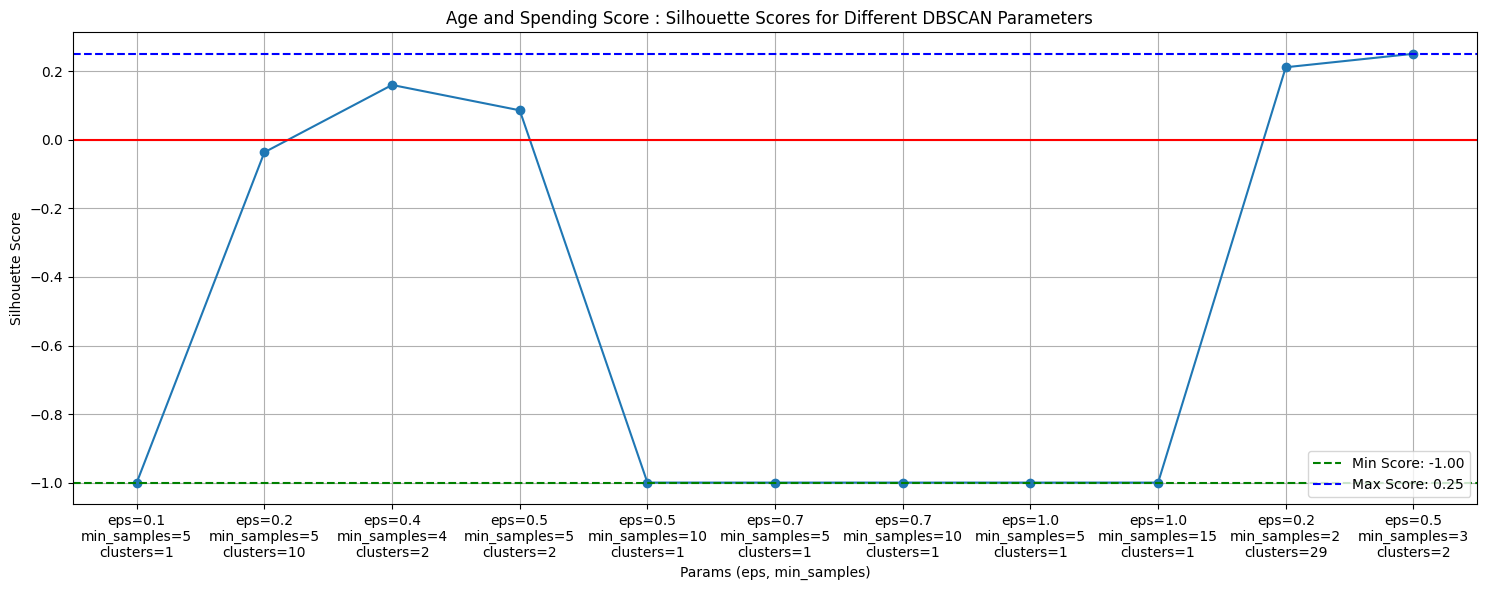

In [157]:
plt.figure(figsize=(15, 6))
plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o')
plt.xticks(range(len(silhouette_scores)),
           [f'eps={eps}\nmin_samples={min_samples}\nclusters={num_clusters}'
            for (eps, min_samples), num_clusters in zip(params, num_clusters)])

plt.title(f'{data.columns[0]} and {data.columns[1]} : Silhouette Scores for Different DBSCAN Parameters  ')
plt.xlabel('Params (eps, min_samples)')
plt.ylabel('Silhouette Score')
min_y = min(silhouette_scores)
max_y = max(silhouette_scores)
plt.axhline(y=0, color='r')
plt.axhline(y=min_y, color='g', linestyle='--', label=f'Min Score: {min_y:.2f}')
plt.axhline(y=max_y, color='b', linestyle='--', label=f'Max Score: {max_y:.2f}')
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

**Kesimpulan** : Untuk pasangan atribut ini, nilai param terbaik adalah eps = **0.5** dan min samples =**3**yang mendapatkan kluster sebanyak **2**. Hal ini didapat dengan menghitung nilai koef siluetny = **0.25**

# **B. Perbandingan k-Means vs Agglomerative vs DBSCAN**

Pada bagian ini akan dibandingkan proses clustering menggunakan Kmeans, agglo, dan dbscan. Prose akan dibagi berdasarkan tipe atributnya dulu, Income VS spending score terlebih dahulu, dilanjutkan dengan age vs spending score.

##  **income VS spending_score**

In [158]:
# list of tuple (exec time, what algo used for)
times = []
silhouette_scores = []
silhouette_scores.clear()
times.clear()
data= income_spending_score.copy()

### Kmeans
Untuk klusterin kmeans kali ini menggunakan k = 5, nilai k didapat berdasarkan eksplorasi sebelumnya

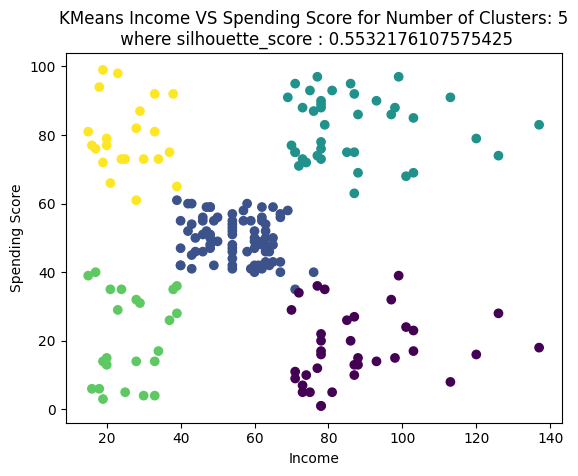

In [159]:
num_cluster = 5
start_time = time.time()
kmeans = KMeans(n_clusters=num_cluster)
kmeans.fit(data)
score = silhouette_score(data, kmeans.labels_)

plt.scatter(data[data.columns[0]], data[data.columns[1]], c=kmeans.labels_)

plt.title(f'KMeans {data.columns[0]} VS {data.columns[1]} for Number of Clusters: {num_cluster}\n where silhouette_score : {score}')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()
end_time = time.time()



times.append ((end_time - start_time, 'Kmeans'))
silhouette_scores.append ((score, 'Kmeans'))

### Agglomerative : Average Linkage
Untuk klusterin agglomerative average linkage kali ini menggunakan k = 6, nilai k didapat berdasarkan eksplorasi sebelumnya

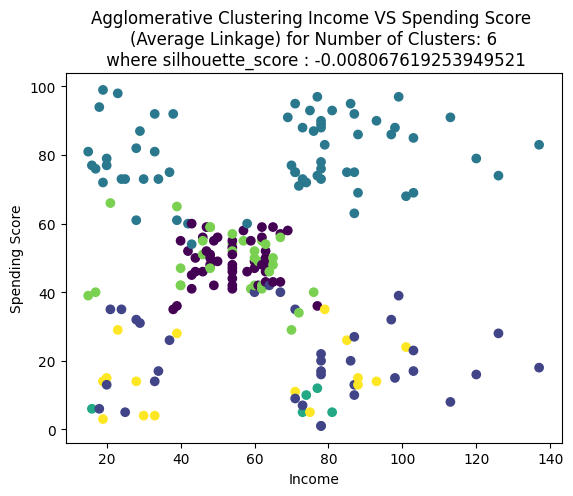

In [160]:
start_time = time.time()
num_cluster = 6
agg_clustering = AgglomerativeClustering(n_clusters=num_cluster, linkage='average')
agg_clustering.fit(data_scaled)
score = silhouette_score(data, agg_clustering.labels_)

plt.scatter(data[data.columns[0]], data[data.columns[1]], c=agg_clustering.labels_)
plt.title(f'Agglomerative Clustering {data.columns[0]} VS {data.columns[1]} \n(Average Linkage) for Number of Clusters: {num_cluster}\n where silhouette_score : {score}')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()
end_time = time.time()

times.append((end_time - start_time, 'Agglomerative Average Linkage'))
silhouette_scores.append ((score, 'Agglomerative Average Linkage'))


### Agglomerative : Single Linkage
Untuk klusterin agglomerative single linkage kali ini menggunakan k = 6, nilai k didapat berdasarkan eksplorasi sebelumnya

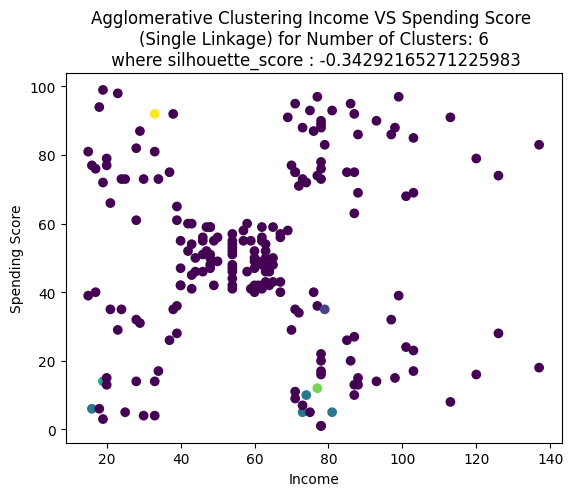

In [161]:
start_time = time.time()
num_cluster = 6
agg_clustering = AgglomerativeClustering(n_clusters=num_cluster, linkage='single')
agg_clustering.fit(data_scaled)
score = silhouette_score(data, agg_clustering.labels_)

plt.scatter(data[data.columns[0]], data[data.columns[1]], c=agg_clustering.labels_)
plt.title(f'Agglomerative Clustering {data.columns[0]} VS {data.columns[1]} \n(Single Linkage) for Number of Clusters: {num_cluster}\n where silhouette_score : {score}')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()
end_time = time.time()

times.append((end_time - start_time, 'Agglomerative Single Linkage'))
silhouette_scores.append ((score, 'Agglomerative Single Linkage'))


### Agglomerative : Complete Linkage
Untuk klusterin agglomerative double linkage kali ini menggunakan k = 6, nilai k didapat berdasarkan eksplorasi sebelumnya

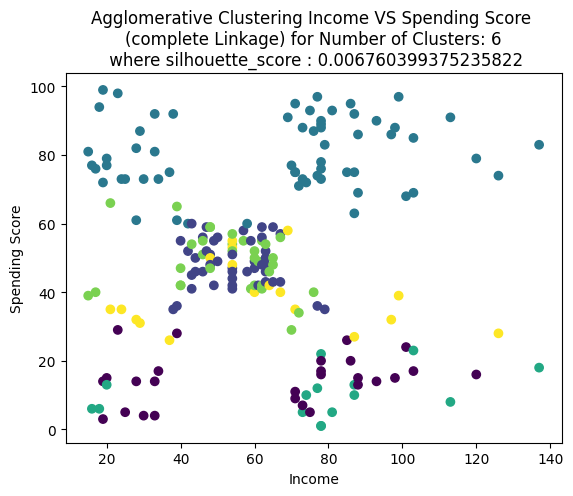

In [162]:
start_time = time.time()
num_cluster = 6
agg_clustering = AgglomerativeClustering(n_clusters=num_cluster, linkage='complete')
agg_clustering.fit(data_scaled)
score = silhouette_score(data, agg_clustering.labels_)

plt.scatter(data[data.columns[0]], data[data.columns[1]], c=agg_clustering.labels_)
plt.title(f'Agglomerative Clustering {data.columns[0]} VS {data.columns[1]} \n(complete Linkage) for Number of Clusters: {num_cluster}\n where silhouette_score : {score}')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()
end_time = time.time()

times.append((end_time - start_time, 'Agglomerative complete Linkage'))
silhouette_scores.append ((score, 'Agglomerative complete Linkage'))

### DBScan
Untuk klusterin dbscan kali ini menggunakan PARAMS eps = 0.5dan min samples =10 , nilai params didapat berdasarkan eksplorasi sebelumnya

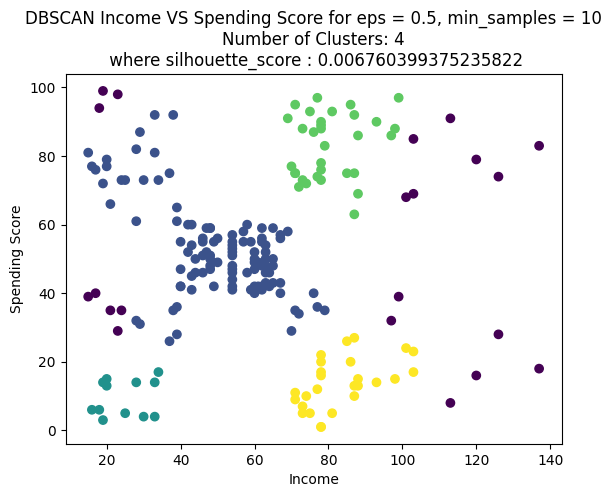

In [163]:
eps, min_samples = 0.5 , 10
data_scaled = scaler.fit_transform(data)

start_time = time.time()
dbscan = DBSCAN(eps = eps, min_samples = min_samples)
clusters = dbscan.fit_predict(data_scaled)
score = silhouette_score(data, agg_clustering.labels_)

data['Cluster'] = clusters
num_cluster = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise (if -1 in clusters)

plt.scatter(data[data.columns[0]], data[data.columns[1]], c=data['Cluster'])
plt.title(f'DBSCAN {data.columns[0]} VS {data.columns[1]} for eps = {eps}, min_samples = {min_samples}\nNumber of Clusters: {num_cluster}\n where silhouette_score : {score}')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()
end_time = time.time()

times.append ((end_time - start_time, 'DBScan'))
silhouette_scores.append ((score, 'DBScan'))


### Kesimpulan
Dari ketiga jenis algoritma tersebut, didapatkan bahwa urutan waktu eksekusi (dari kecil ke besar) algoritma clustering untuk pasangan atribut **income vs spending score** adalah
1. Kmeans
2. Agglomerative
3. DBscan

Sedangkan Dari ketiga jenis algoritma tersebut, didapatkan bahwa urutan Silhouette Scores (dari kecil ke besar) algoritma clustering untuk pasangan atribut **income vs spending score** adalah
1. Agglomerative
2. DBscan
3. Kmeans

In [164]:
print (f'Exec Time comparison for every algorithm of Clustering {data.columns[0]} VS {data.columns[1]}')
print(sorted(times))

Exec Time comparison for every algorithm of Clustering Income VS Spending Score
[(0.399341344833374, 'Agglomerative complete Linkage'), (0.41817235946655273, 'DBScan'), (0.6640772819519043, 'Agglomerative Single Linkage'), (0.9107644557952881, 'Kmeans'), (0.9640605449676514, 'Agglomerative Average Linkage')]


In [165]:
print (f'silhouette_scores comparison for every algorithm of Clustering {data.columns[0]} VS {data.columns[1]}')

print(sorted(silhouette_scores))

silhouette_scores comparison for every algorithm of Clustering Income VS Spending Score
[(-0.34292165271225983, 'Agglomerative Single Linkage'), (-0.008067619253949521, 'Agglomerative Average Linkage'), (0.006760399375235822, 'Agglomerative complete Linkage'), (0.006760399375235822, 'DBScan'), (0.5532176107575425, 'Kmeans')]


##  **Age VS spending_score**

In [166]:
# list of tuple (exec time, what algo used for)
times = []
silhouette_scores = []
times.clear()
silhouette_scores.clear()
data= age_spending_score.copy()

### Kmeans
Untuk klusterin kmeans kali ini menggunakan k = 5, nilai k didapat berdasarkan eksplorasi sebelumnya

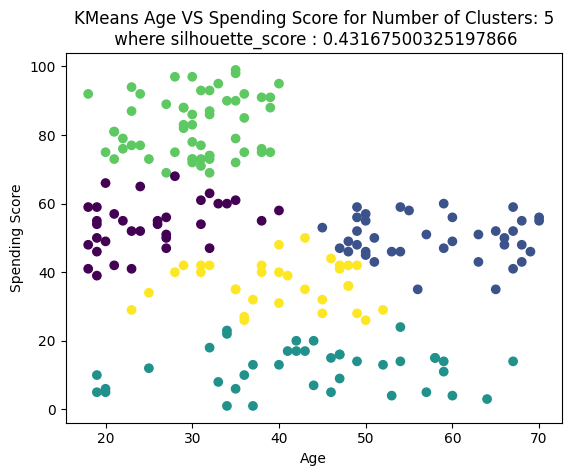

In [167]:
num_cluster = 5
start_time = time.time()
kmeans = KMeans(n_clusters=num_cluster)
kmeans.fit(data)
score = silhouette_score(data, kmeans.labels_)

plt.scatter(data[data.columns[0]], data[data.columns[1]], c=kmeans.labels_)

plt.title(f'KMeans {data.columns[0]} VS {data.columns[1]} for Number of Clusters: {num_cluster}\n where silhouette_score : {score}')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()
end_time = time.time()



times.append ((end_time - start_time, 'Kmeans'))
silhouette_scores.append ((score, 'Kmeans'))

### Agglomerative : Average Linkage
Untuk klusterin agglomerative average linkage kali ini menggunakan k = 6, nilai k didapat berdasarkan eksplorasi sebelumnya

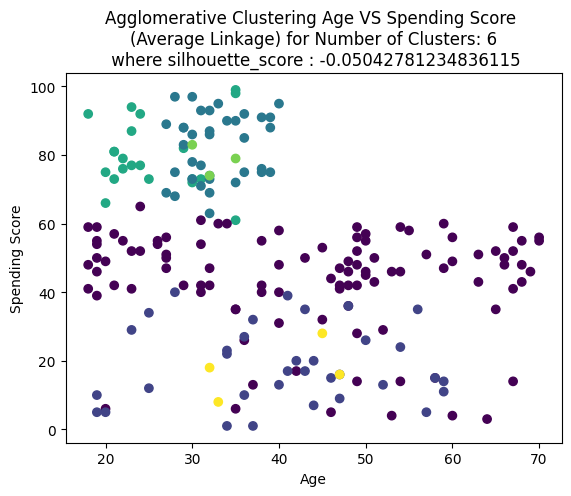

In [168]:
start_time = time.time()
num_cluster = 6
agg_clustering = AgglomerativeClustering(n_clusters=num_cluster, linkage='average')
agg_clustering.fit(data_scaled)
score = silhouette_score(data, agg_clustering.labels_)

plt.scatter(data[data.columns[0]], data[data.columns[1]], c=agg_clustering.labels_)
plt.title(f'Agglomerative Clustering {data.columns[0]} VS {data.columns[1]} \n(Average Linkage) for Number of Clusters: {num_cluster}\n where silhouette_score : {score}')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()
end_time = time.time()

times.append((end_time - start_time, 'Agglomerative Average Linkage'))
silhouette_scores.append ((score, 'Agglomerative Average Linkage'))


### Agglomerative : Single Linkage
Untuk klusterin agglomerative single linkage kali ini menggunakan k = 6, nilai k didapat berdasarkan eksplorasi sebelumnya

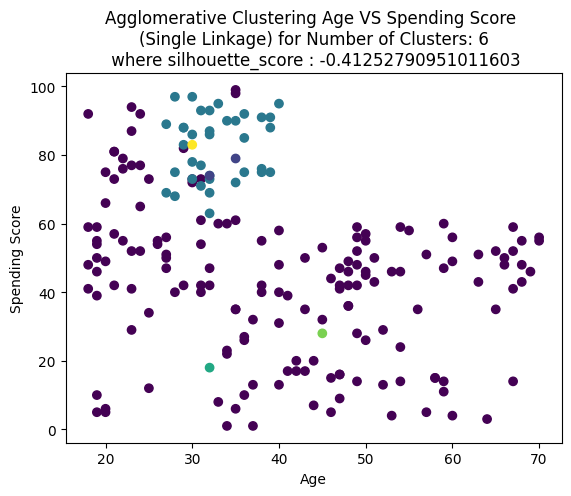

In [169]:
start_time = time.time()
num_cluster = 6
agg_clustering = AgglomerativeClustering(n_clusters=num_cluster, linkage='single')
agg_clustering.fit(data_scaled)
score = silhouette_score(data, agg_clustering.labels_)

plt.scatter(data[data.columns[0]], data[data.columns[1]], c=agg_clustering.labels_)
plt.title(f'Agglomerative Clustering {data.columns[0]} VS {data.columns[1]} \n(Single Linkage) for Number of Clusters: {num_cluster}\n where silhouette_score : {score}')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()
end_time = time.time()

times.append((end_time - start_time, 'Agglomerative Single Linkage'))
silhouette_scores.append ((score, 'Agglomerative Single Linkage'))


### Agglomerative : Complete Linkage
Untuk klusterin agglomerative double linkage kali ini menggunakan k = 6, nilai k didapat berdasarkan eksplorasi sebelumnya

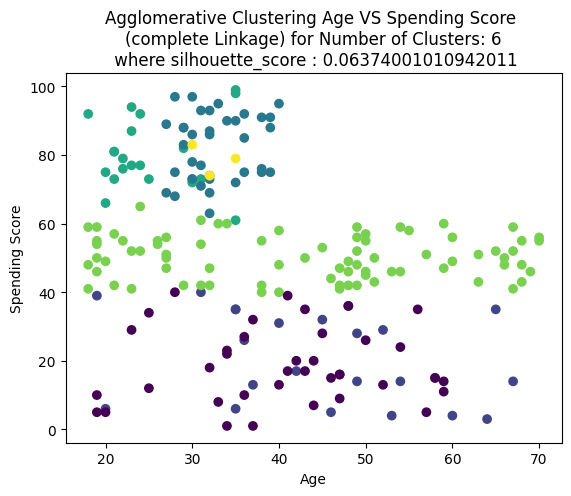

In [170]:
start_time = time.time()
num_cluster = 6
agg_clustering = AgglomerativeClustering(n_clusters=num_cluster, linkage='complete')
agg_clustering.fit(data_scaled)
score = silhouette_score(data, agg_clustering.labels_)

plt.scatter(data[data.columns[0]], data[data.columns[1]], c=agg_clustering.labels_)
plt.title(f'Agglomerative Clustering {data.columns[0]} VS {data.columns[1]} \n(complete Linkage) for Number of Clusters: {num_cluster}\n where silhouette_score : {score}')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()
end_time = time.time()

times.append((end_time - start_time, 'Agglomerative complete Linkage'))
silhouette_scores.append ((score, 'Agglomerative complete Linkage'))

### DBScan
Untuk klusterin dbscan kali ini menggunakan PARAMS eps = 0.5dan min samples =10 , nilai params didapat berdasarkan eksplorasi sebelumnya

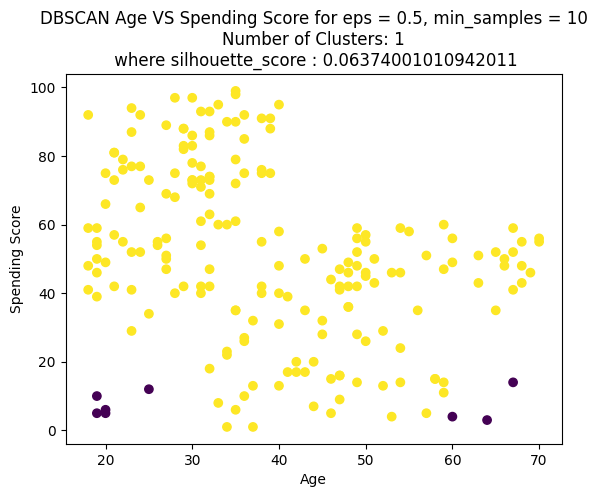

In [171]:
eps, min_samples = 0.5 , 10
data_scaled = scaler.fit_transform(data)

start_time = time.time()
dbscan = DBSCAN(eps = eps, min_samples = min_samples)
clusters = dbscan.fit_predict(data_scaled)
score = silhouette_score(data, agg_clustering.labels_)

data['Cluster'] = clusters
num_cluster = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise (if -1 in clusters)

plt.scatter(data[data.columns[0]], data[data.columns[1]], c=data['Cluster'])
plt.title(f'DBSCAN {data.columns[0]} VS {data.columns[1]} for eps = {eps}, min_samples = {min_samples}\nNumber of Clusters: {num_cluster}\n where silhouette_score : {score}')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()
end_time = time.time()

times.append ((end_time - start_time, 'DBScan'))
silhouette_scores.append ((score, 'DBScan'))


### Kesimpulan
Dari ketiga jenis algoritma tersebut, didapatkan bahwa urutan waktu eksekusi (dari kecil ke besar) algoritma clustering untuk pasangan atribut **income vs spending score** adalah
1. Kmeans
2. Agglomerative
3. DBscan

Sedangkan Dari ketiga jenis algoritma tersebut, didapatkan bahwa urutan Silhouette Scores (dari kecil ke besar) algoritma clustering untuk pasangan atribut **income vs spending score** adalah
1. Agglomerative
2. DBscan
3. Kmeans

In [172]:
print (f'Exec Time comparison for every algorithm of Clustering {data.columns[0]} VS {data.columns[1]}')
print(sorted(times))

Exec Time comparison for every algorithm of Clustering Age VS Spending Score
[(0.4521026611328125, 'Kmeans'), (0.5694096088409424, 'Agglomerative Average Linkage'), (0.6121869087219238, 'DBScan'), (0.6610865592956543, 'Agglomerative Single Linkage'), (0.7091794013977051, 'Agglomerative complete Linkage')]


In [173]:
print (f'silhouette_scores comparison for every algorithm of Clustering {data.columns[0]} VS {data.columns[1]}')

print(sorted(silhouette_scores))

silhouette_scores comparison for every algorithm of Clustering Age VS Spending Score
[(-0.41252790951011603, 'Agglomerative Single Linkage'), (-0.05042781234836115, 'Agglomerative Average Linkage'), (0.06374001010942011, 'Agglomerative complete Linkage'), (0.06374001010942011, 'DBScan'), (0.43167500325197866, 'Kmeans')]


## **Kesimpulan point B**

Waktu **eksekusi** yang dihasilkan oleh ketiga algoritma berbeda karena cara kerja dan kompleksitas masing-masing. **KMeans** adalah yang tercepat karena hanya perlu menghitung jarak Euclidean dan memperbarui centroid. **Agglomerative Clustering** lebih lambat karena harus menghitung jarak antara semua pasangan titik data. **DBSCAN** paling lambat karena harus menghitung jarak untuk setiap titik dan tetangganya, sehingga semakin banyak titik yang diproses, semakin lama juga.

Nilai **Silhouette Score** yang dihasilkan oleh ketiga algoritma juga berbeda berdasarkan cara mereka mengelompokkan data. **KMeans** menghasilkan nilai tertinggi karena cluster yang terbentuk cenderung terpisah. **DBSCAN** menghasilkan skor menengah karena mampu menangani cluster bentuk tidak teratur, tetapi sangat bergantung pada parameter yang dipilih, serta kehadiran noise yang dapat memperjelek hasil. **Agglomerative Clustering** menghasilkan skor terendah karena sering menghasilkan cluster yang tidak kompak dan kurang jelas terpisah, terutama dengan complete linkage yang memprioritaskan jarak terjauh.

# **C. Perbandingan k-Means vs Agglomerative vs DBSCAN dengan Data Sintetis**

Pada bagian ini akan dibandingkan proses clustering menggunakan Kmeans, agglo, dan dbscan. Proses perbandingan ini akan menggunakan dataset baru yang di generate dengan blobs.

##  **Pembuatan dataset**

### Membuat dataset pertama yang memiliki pola cluster-cluster

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def create_clustered_dataset(n_samples=1000, n_features=2, centers=4, cluster_std=2, noise_samples=300, noise_scale=2.0, random_state=42):
    # Membuat dataset kluster
    X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=random_state)

    # Membuat noise
    noise_data = np.random.rand(noise_samples, n_features) * noise_scale

    # Menggabungkan noise dengan dataset utama
    X = np.vstack((X, noise_data))

    return X, y

Plotting pola dataset pertama

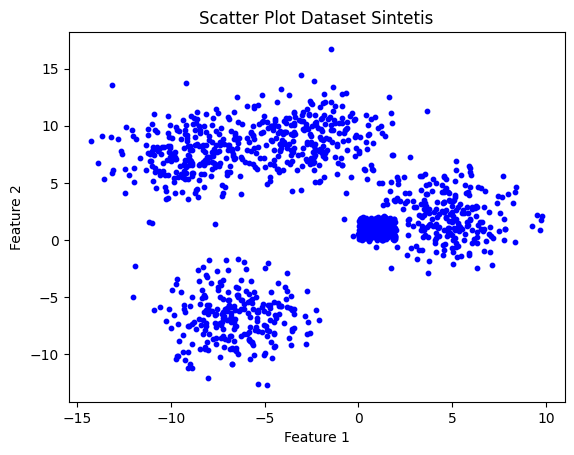

In [175]:
cluster_dataset, y = create_clustered_dataset()

plt.scatter(cluster_dataset[:, 0], cluster_dataset[:, 1], c='blue', s=10)
plt.title("Scatter Plot Dataset Sintetis")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Membuat dataset ke-2 yang memiliki pola berbentuk kotak

In [176]:
def generate_box_dataset(inner_size=400, outer_size=500, thickness=50, num_points_inner=600, num_points_outer=1200):
    # untuk membuat kotak padat di tengah
    inner_points_x = np.random.randint(inner_size, outer_size, num_points_inner)
    inner_points_y = np.random.randint(inner_size, outer_size, num_points_inner)

    # untuk membuat outline kotak di luarnya
    outer_points_x = []
    outer_points_y = []
    for _ in range(num_points_outer):
        if np.random.rand() > 0.5:
            # untuk vertikal
            x = np.random.uniform(inner_size, outer_size)
            y = np.random.choice([np.random.uniform(outer_size, outer_size + thickness),
                                  np.random.uniform(inner_size-thickness, inner_size)])
        else:
            # untuk horizontal
            x = np.random.choice([np.random.uniform(inner_size-thickness, inner_size),
                                  np.random.uniform(outer_size, outer_size + thickness)])
            y = np.random.uniform(inner_size, outer_size)

        outer_points_x.append(x)
        outer_points_y.append(y)

    # gabungkan titik-titik
    X_inner = np.column_stack((inner_points_x, inner_points_y))
    X_outer = np.column_stack((outer_points_x, outer_points_y))

    # label untuk titik-titik
    y_inner = np.zeros(num_points_inner)
    y_outer = np.ones(num_points_outer)

    # gabungkan dataset
    X = np.vstack((X_inner, X_outer))
    y = np.concatenate((y_inner, y_outer))

    # gabungkan kedalam satu dataset
    box_dataset = np.column_stack((X, y))

    return box_dataset


Plotting pola dataset ke-2

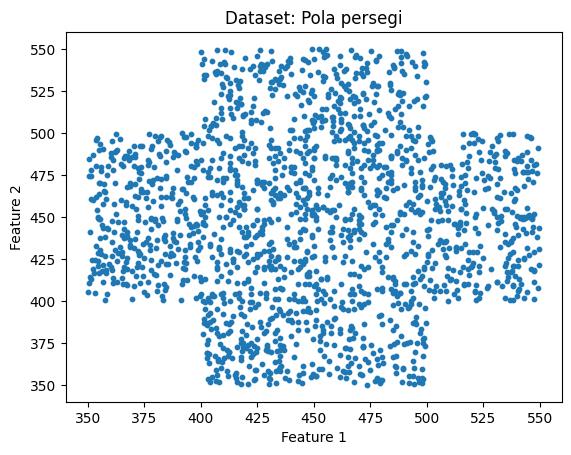

In [177]:
box_dataset = generate_box_dataset()

# Visualisasi dataset kotak
plt.scatter(box_dataset[:, 0], box_dataset[:, 1], s=10)
plt.title("Dataset: Pola persegi")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Membuat dataset ke-3 yang memiliki pola lingkaran

In [178]:
def generate_circle_dataset(radius_inner=200, radius_outer=300, num_points_inner=500, num_points_outer=1000):
    # untuk membuat lingkaran ditengah
    angles_inner = np.random.uniform(0, 2*np.pi, num_points_inner)
    radii_inner = np.random.uniform(0, radius_inner, num_points_inner)
    inner_points_x = radii_inner * np.cos(angles_inner) + radius_outer
    inner_points_y = radii_inner * np.sin(angles_inner) + radius_outer

    # untuk membuat outline lingkaran yang diluar
    outer_points_x = []
    outer_points_y = []
    for _ in range(num_points_outer):
        angle = np.random.uniform(0, 2*np.pi)
        radius = np.random.uniform(radius_outer, radius_outer + 50)
        x = radius * np.cos(angle) + radius_outer
        y = radius * np.sin(angle) + radius_outer
        outer_points_x.append(x)
        outer_points_y.append(y)

    # gabungkan titik-titik
    X_inner = np.column_stack((inner_points_x, inner_points_y))
    X_outer = np.column_stack((outer_points_x, outer_points_y))

    # label untuk titik-titik
    y_inner = np.zeros(num_points_inner)
    y_outer = np.ones(num_points_outer)

    # gabungkan dataset
    X = np.vstack((X_inner, X_outer))
    y = np.concatenate((y_inner, y_outer))

    # menggabungkan dataset menjadi satu dataset
    circle_dataset = np.column_stack((X, y))

    return circle_dataset


Plotting dataset ke-3

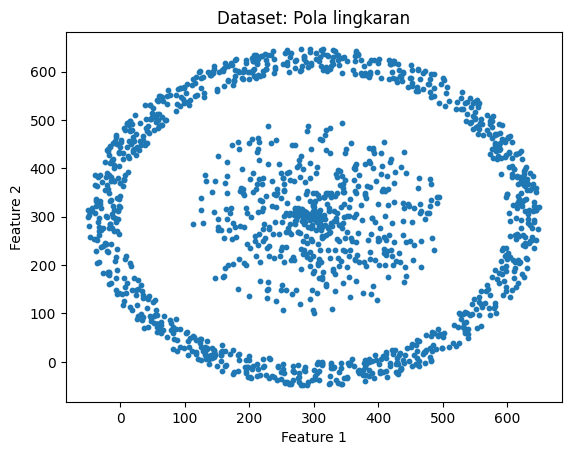

In [179]:
circle_dataset = generate_circle_dataset()

# Visualisasi dataset kotak
plt.scatter(circle_dataset[:, 0], circle_dataset[:, 1], s=10)
plt.title("Dataset: Pola lingkaran")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



In [180]:
datasets = [cluster_dataset, box_dataset, circle_dataset]
titles = ["Pola Cluster", "Pola Persegi", "Pola Lingkaran"]

### Analisis pengelompokan dataset dengan K-means
untuk dataset pola cluster, persegi, dan lingkaran, masing-masing mendapat nilai k optimal pada 3, 4, dan 6, dengan nilai silhouette score masing-masing sekitar 0.63, 0.40, 0.46


== Pola Cluster ==
K: 2, Silhouette Score: 0.4871980063597214
K: 3, Silhouette Score: 0.6371479672007693
K: 4, Silhouette Score: 0.5468042787385861
K: 5, Silhouette Score: 0.5562203522970522
K: 6, Silhouette Score: 0.5543258361124632
K: 7, Silhouette Score: 0.4865784071351938
K: 8, Silhouette Score: 0.43604581196371556
K: 9, Silhouette Score: 0.4334107001775182
K: 10, Silhouette Score: 0.43148921244703337

K-Means terbaik: k=3 dengan Silhouette Score: 0.6371479672007693


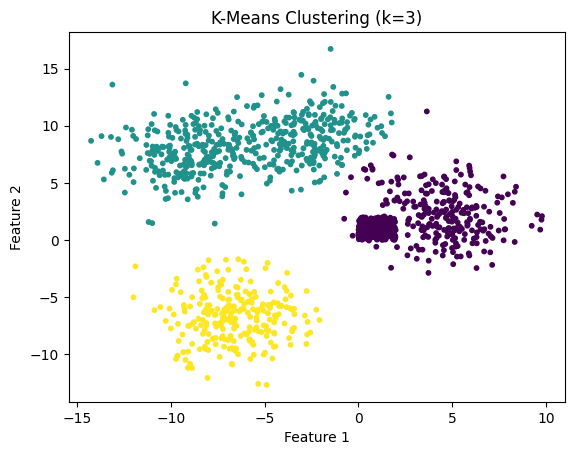


== Pola Persegi ==
K: 2, Silhouette Score: 0.35884849324871515
K: 3, Silhouette Score: 0.37473658240811036
K: 4, Silhouette Score: 0.4058276171986653
K: 5, Silhouette Score: 0.356868858394512
K: 6, Silhouette Score: 0.33358063925673176
K: 7, Silhouette Score: 0.3754380422524661
K: 8, Silhouette Score: 0.3708758429009895
K: 9, Silhouette Score: 0.3689491380535582
K: 10, Silhouette Score: 0.37468163943670807

K-Means terbaik: k=4 dengan Silhouette Score: 0.4058276171986653


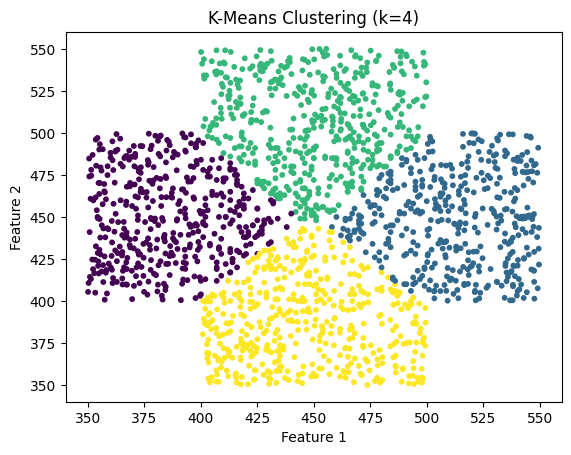


== Pola Lingkaran ==
K: 2, Silhouette Score: 0.3363762589640811
K: 3, Silhouette Score: 0.36449824079797605
K: 4, Silhouette Score: 0.356236966145301
K: 5, Silhouette Score: 0.4445133330440621
K: 6, Silhouette Score: 0.4757620721828621
K: 7, Silhouette Score: 0.45445363360472835
K: 8, Silhouette Score: 0.45466275320177496
K: 9, Silhouette Score: 0.41214576207500075
K: 10, Silhouette Score: 0.43323127194234096

K-Means terbaik: k=6 dengan Silhouette Score: 0.4757620721828621


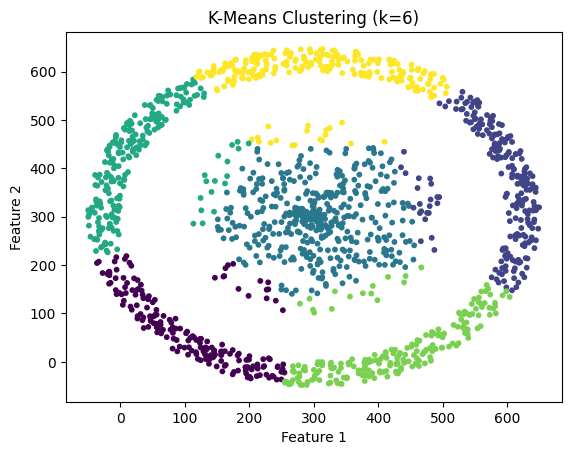

In [181]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_best_k_means(X):
    best_k = 0
    best_score = -1
    best_labels = None

    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)

        print(f"K: {k}, Silhouette Score: {score}")

        if score > best_score:
            best_score = score
            best_k = k
            best_labels = labels

    # Visualisasi dengan k terbaik
    print(f"\nK-Means terbaik: k={best_k} dengan Silhouette Score: {best_score}")
    plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', s=10)
    plt.title(f"K-Means Clustering (k={best_k})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Uji K-Means untuk ketiga dataset
for i, X in enumerate(datasets):
    print(f"\n== {titles[i]} ==")
    find_best_k_means(X)


### Analisis pengelompokan dataset dengan AgglomerativeClustering
untuk dataset pola cluster, persegi, dan lingkaran, masing-masing mendapat nilai k optimal pada 3, 5, dan 5, dengan nilai silhouette score masing-masing sekitar 0.62, 0.56, 0.55


== Pola Cluster ==
n_clusters: 2, Silhouette Score: 0.4827716557900209
n_clusters: 3, Silhouette Score: 0.6276161169010263
n_clusters: 4, Silhouette Score: 0.5987577225268137
n_clusters: 5, Silhouette Score: 0.5408016618009139
n_clusters: 6, Silhouette Score: 0.5090902454819997
n_clusters: 7, Silhouette Score: 0.43978072805396823
n_clusters: 8, Silhouette Score: 0.3972143479694483
n_clusters: 9, Silhouette Score: 0.3807012549470365
n_clusters: 10, Silhouette Score: 0.37882906967358937

Agglomerative Clustering terbaik: n_clusters=3 dengan Silhouette Score: 0.6276161169010263


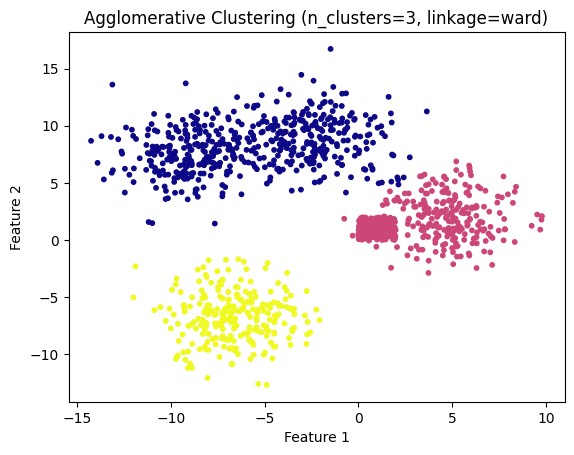


== Pola Persegi ==
n_clusters: 2, Silhouette Score: 0.3539758771016038
n_clusters: 3, Silhouette Score: 0.3452589225112412
n_clusters: 4, Silhouette Score: 0.38645768013039844
n_clusters: 5, Silhouette Score: 0.3498620537329417
n_clusters: 6, Silhouette Score: 0.3285235336669274
n_clusters: 7, Silhouette Score: 0.30793597213269186
n_clusters: 8, Silhouette Score: 0.30741054413985563
n_clusters: 9, Silhouette Score: 0.32761516254251816
n_clusters: 10, Silhouette Score: 0.3300941816878516

Agglomerative Clustering terbaik: n_clusters=4 dengan Silhouette Score: 0.38645768013039844


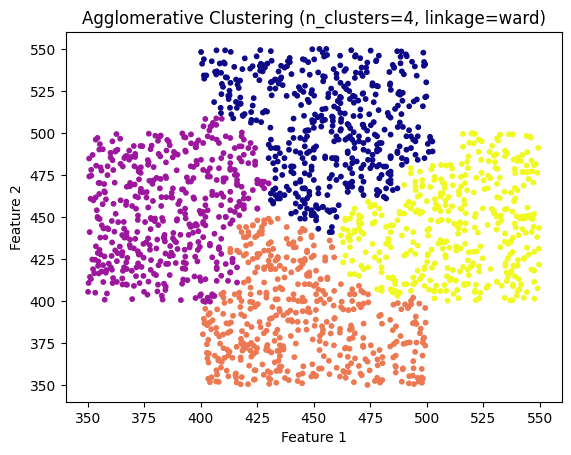


== Pola Lingkaran ==
n_clusters: 2, Silhouette Score: 0.3058952860012694
n_clusters: 3, Silhouette Score: 0.28954924139780785
n_clusters: 4, Silhouette Score: 0.32787952363910344
n_clusters: 5, Silhouette Score: 0.39801268778947685
n_clusters: 6, Silhouette Score: 0.4204535917145844
n_clusters: 7, Silhouette Score: 0.4328583862389538
n_clusters: 8, Silhouette Score: 0.4338517197686472
n_clusters: 9, Silhouette Score: 0.39117779311148676
n_clusters: 10, Silhouette Score: 0.387107591948758

Agglomerative Clustering terbaik: n_clusters=8 dengan Silhouette Score: 0.4338517197686472


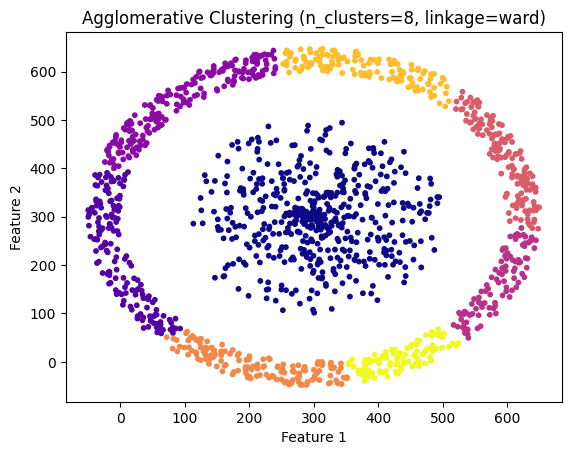

In [182]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Fungsi untuk mencari jumlah kluster terbaik dengan Agglomerative Clustering
def find_best_agglomerative(X, linkage='ward'):
    best_n = 0
    best_score = -1
    best_labels = None

    for n in range(2, 11):
        agglo = AgglomerativeClustering(n_clusters=n, linkage=linkage)
        labels = agglo.fit_predict(X)

        # Hitung Silhouette Score
        score = silhouette_score(X, labels)
        print(f"n_clusters: {n}, Silhouette Score: {score}")

        if score > best_score:
            best_score = score
            best_n = n
            best_labels = labels

    # Visualisasi hasil clustering dengan jumlah kluster terbaik
    print(f"\nAgglomerative Clustering terbaik: n_clusters={best_n} dengan Silhouette Score: {best_score}")
    plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='plasma', s=10)
    plt.title(f"Agglomerative Clustering (n_clusters={best_n}, linkage={linkage})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Uji Agglomerative Clustering dengan n_clusters dari 2 sampai 10 untuk ketiga dataset
linkage_methods = ['ward', 'single', 'complete', 'average']  # Anda bisa coba berbagai metode linkage

for i, X_scaled in enumerate(datasets):
    print(f"\n== {titles[i]} ==")
    find_best_agglomerative(X_scaled, linkage='ward')  # Ubah 'ward' dengan metode linkage yang diinginkan


### Analisis pengelompokan dataset dengan DBSCAN
untuk dataset pola cluster, persegi, dan lingkaran, masing-masing mendapat nilai eps optimal pada 0.2, 0.3, dan 0.3.


== Pola Cluster ==
eps: 0.1, Silhouette Score: -0.11020908515427683
eps: 0.2, Silhouette Score: 0.5664307934511191
eps: 0.30000000000000004, Silhouette Score: 0.42076568483704274
eps: 0.4, Silhouette Score: 0.40129127313899654
eps: 0.5, Silhouette Score: 0.3507261327536746
eps: 0.6, Silhouette Score: 0.32482219774373533
eps: 0.7000000000000001, Silhouette Score: -1
eps: 0.8, Silhouette Score: -1
eps: 0.9, Silhouette Score: -1
eps: 1.0, Silhouette Score: -1

DBSCAN terbaik: eps=0.2 dengan Silhouette Score: 0.5664307934511191


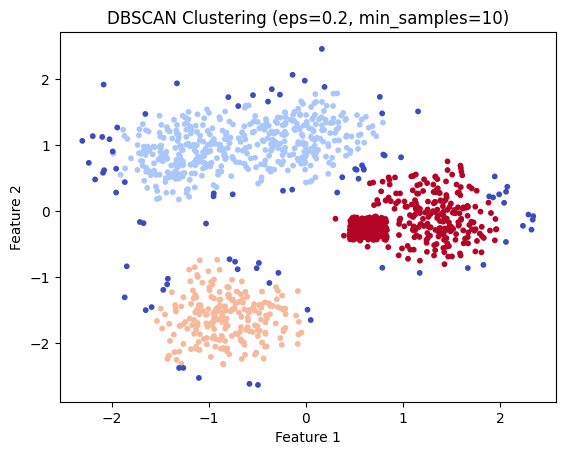


== Pola Persegi ==
eps: 0.1, Silhouette Score: -0.5690081229594461
eps: 0.2, Silhouette Score: 0.3180755196482951
eps: 0.30000000000000004, Silhouette Score: 0.3745741209367869
eps: 0.4, Silhouette Score: 0.3745741209367869
eps: 0.5, Silhouette Score: 0.3745741209367869
eps: 0.6, Silhouette Score: 0.3745741209367869
eps: 0.7000000000000001, Silhouette Score: 0.3745741209367869
eps: 0.8, Silhouette Score: 0.3745741209367869
eps: 0.9, Silhouette Score: 0.3745741209367869
eps: 1.0, Silhouette Score: 0.3745741209367869

DBSCAN terbaik: eps=0.30000000000000004 dengan Silhouette Score: 0.3745741209367869


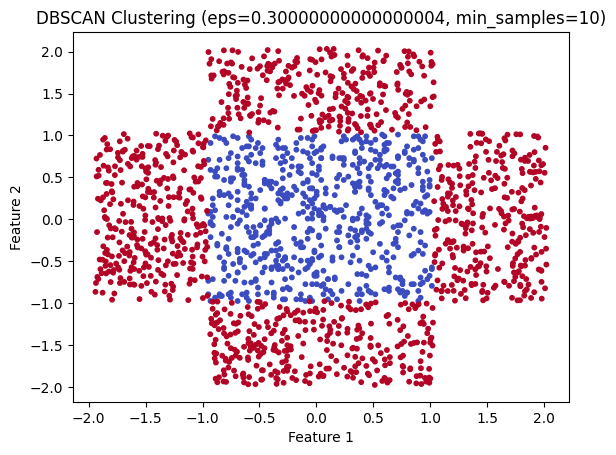


== Pola Lingkaran ==
eps: 0.1, Silhouette Score: 0.1886603344136511
eps: 0.2, Silhouette Score: 0.22433888775208866
eps: 0.30000000000000004, Silhouette Score: 0.39276493250886924
eps: 0.4, Silhouette Score: 0.39276493250886924
eps: 0.5, Silhouette Score: 0.39276493250886924
eps: 0.6, Silhouette Score: 0.39276493250886924
eps: 0.7000000000000001, Silhouette Score: 0.39276493250886924
eps: 0.8, Silhouette Score: 0.39276493250886924
eps: 0.9, Silhouette Score: 0.39276493250886924
eps: 1.0, Silhouette Score: 0.39276493250886924

DBSCAN terbaik: eps=0.30000000000000004 dengan Silhouette Score: 0.39276493250886924


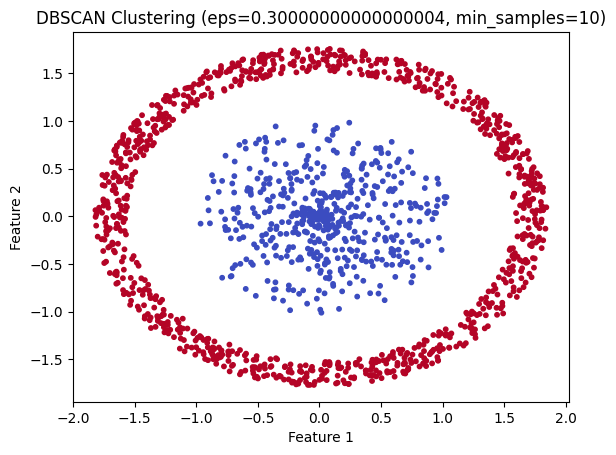

In [183]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Fungsi untuk eksplorasi eps terbaik menggunakan DBSCAN
def explore_dbscan_eps(X, eps_values, min_samples=10):
    best_eps = 0
    best_score = -1
    best_labels = None

    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Hitung silhouette score jika ada lebih dari 1 cluster
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
        else:
            score = -1  # Jika hanya 1 cluster, silhouette score tidak valid

        print(f"eps: {eps}, Silhouette Score: {score}")

        if score > best_score:
            best_score = score
            best_eps = eps
            best_labels = labels

    # Visualisasi hasil dengan eps terbaik
    print(f"\nDBSCAN terbaik: eps={best_eps} dengan Silhouette Score: {best_score}")
    plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='coolwarm', s=10)
    plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={min_samples})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    return best_eps, best_score

# Langkah pertama: Normalisasi dataset
scaler = StandardScaler()
datasets_scaled = [scaler.fit_transform(X) for X in datasets]

# Eksplorasi nilai eps terbaik untuk ketiga dataset
eps_values = np.linspace(0.1, 1.0, 10)  # nilai eps dari 0.1 sampai 1.0 dengan 10 langkah
for i, X_scaled in enumerate(datasets_scaled):
    print(f"\n== {titles[i]} ==")
    explore_dbscan_eps(X_scaled, eps_values)


### Perbandingan kinerja Algoritma
Dapat dilihat bahwa algoritma tercepat adalah k means

In [184]:
import time

def evaluate_algorithms(X, algorithms):
    for name, algorithm in algorithms:
        start_time = time.time()
        labels = algorithm.fit_predict(X)
        end_time = time.time()

        exec_time = end_time - start_time
        if len(set(labels)) > 1:  # Silhouette Score is only defined when there are at least 2 clusters
            score = silhouette_score(X, labels)
        else:
            score = -1  # Invalid silhouette score for single cluster

        print(f"{name} - Waktu Eksekusi: {exec_time:.4f} detik, Silhouette Score: {score:.4f}")

algorithms = [
    ("K-Means (k=4)", KMeans(n_clusters=4, random_state=42)),
    ("Agglomerative (n_clusters=4)", AgglomerativeClustering(n_clusters=4)),
    ("DBSCAN (eps=0.5)", DBSCAN(eps=0.5))
]

# Evaluasi setiap algoritma untuk ketiga dataset
for i, X in enumerate(datasets):
    print(f"\n== Evaluasi: {titles[i]} ==")
    evaluate_algorithms(X, algorithms)



== Evaluasi: Pola Cluster ==
K-Means (k=4) - Waktu Eksekusi: 0.0047 detik, Silhouette Score: 0.5468
Agglomerative (n_clusters=4) - Waktu Eksekusi: 0.0635 detik, Silhouette Score: 0.5988
DBSCAN (eps=0.5) - Waktu Eksekusi: 0.0113 detik, Silhouette Score: 0.0126

== Evaluasi: Pola Persegi ==
K-Means (k=4) - Waktu Eksekusi: 0.0049 detik, Silhouette Score: 0.4058
Agglomerative (n_clusters=4) - Waktu Eksekusi: 0.0972 detik, Silhouette Score: 0.3865
DBSCAN (eps=0.5) - Waktu Eksekusi: 0.0119 detik, Silhouette Score: -1.0000

== Evaluasi: Pola Lingkaran ==
K-Means (k=4) - Waktu Eksekusi: 0.0057 detik, Silhouette Score: 0.3562
Agglomerative (n_clusters=4) - Waktu Eksekusi: 0.0778 detik, Silhouette Score: 0.3279
DBSCAN (eps=0.5) - Waktu Eksekusi: 0.0101 detik, Silhouette Score: -1.0000


### Percobaan dengan kode python yang diberikan

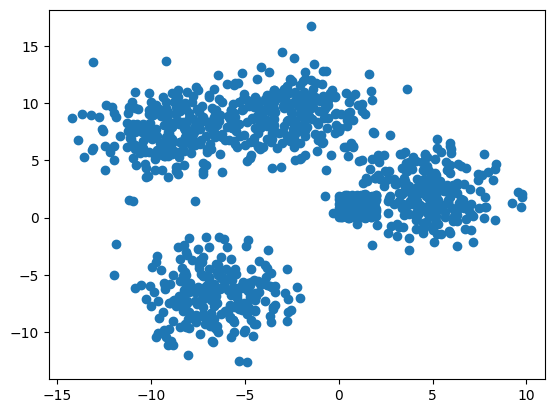

Execution time {algorithm_names[i]}: 0.004092216491699219
Execution time {algorithm_names[i]}: 0.023026704788208008
Execution time {algorithm_names[i]}: 0.018870830535888672


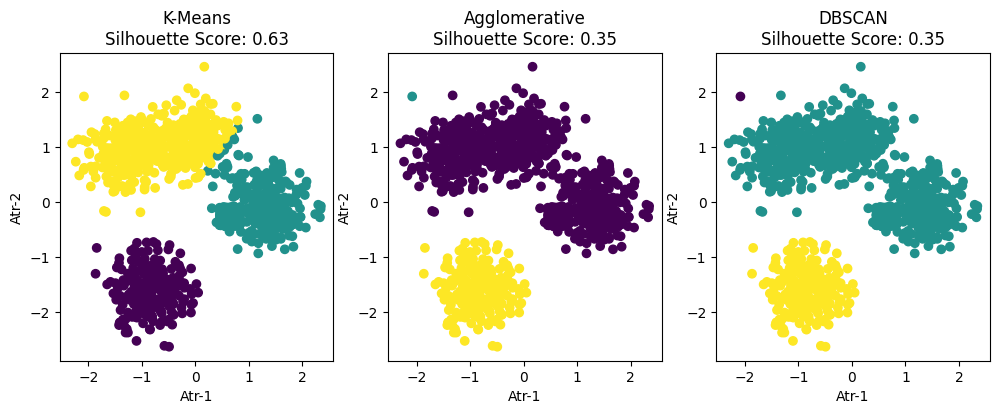

In [185]:
# Eksperimen perbandingan 3 algoritma clustering: k-Means, Agglomerative
# dan DBSCAN dgn dataset sintetis (buatan) dg 2 atribut berbentuk "blob"
#

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Buat data sintetis berbentuk blob
# Ubah sampel ke 300, 500, 1000, 2000, 5000 dst
n_samples = 1000
n_features = 2
#X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=42)
# Coba kombinasi cluster 3-4,4, std = 1, 2, 4, 6, Scale= 5, 10, 15
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=4, cluster_std=2, random_state=42)

# Tambahkan random noise points pada dataset X
# Ubah-ubah jumlah titik/objek noise dan skalanya
noise_samples = 300
noise_data = np.random.rand(noise_samples, n_features) * 2.0  # Ubah-ubah skala noise ini
X = np.vstack((X, noise_data))

# Buat scatter plot dari dataset sintetis
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# Lakukan normalisasi/standardisasi pada fitur (penting utk beberapa alg clustering)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Siapkan instansiasi algoritma clustering yg akan di-fit
# Tuning: mengubah jumlah cluster, tipe jarak, maks iterasi
kmeans = KMeans(n_clusters=3)
# Tuning linkage: single, complete. average, ward
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='single')

# Tuning: mengubah-ubah nilai eps dan min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)

algorithms = [kmeans, agglomerative, dbscan]
algorithm_names = ['K-Means', 'Agglomerative', 'DBSCAN']

# Visualize and compare clustering results
plt.figure(figsize=(12, 4))
plot_num = 1

import time
start_time = time.time()

for i, algorithm in enumerate(algorithms):
    start_time = time.time()
    y_pred = algorithm.fit_predict(X)
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time {algorithm_names[i]}:",execution_time)

    # Hitung silhouette score utk tiap algoritma
    silhouette_avg = silhouette_score(X, y_pred)

    plt.subplot(1, 3, plot_num)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
    plt.title(f'{algorithm_names[i]}\nSilhouette Score: {silhouette_avg:.2f}')
    plt.xlabel("Atr-1")
    plt.ylabel("Atr-2")
    plot_num += 1

plt.show()


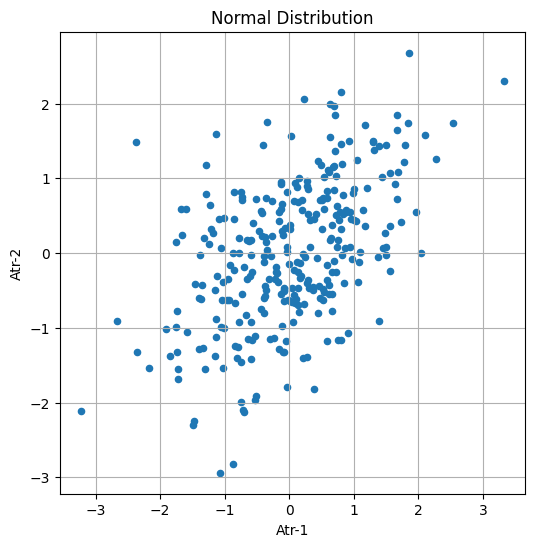

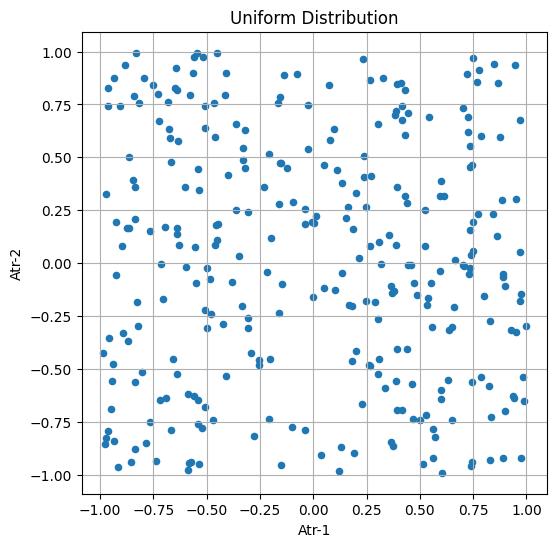

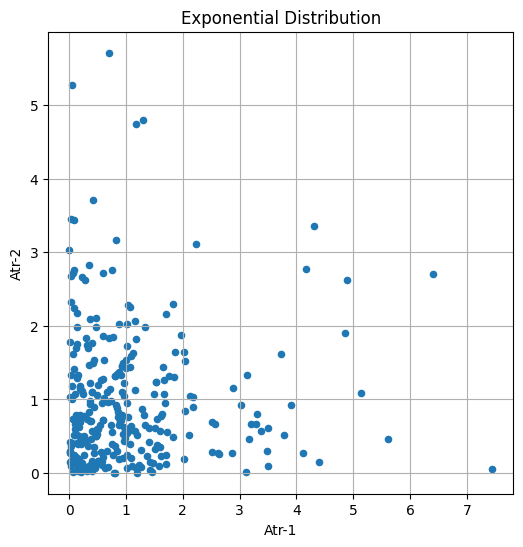


== K-Means Clustering for Normal Distribution ==
k=2, Silhouette Score=0.4005
k=3, Silhouette Score=0.3357
k=4, Silhouette Score=0.3723
k=5, Silhouette Score=0.3420
k=6, Silhouette Score=0.3467
k=7, Silhouette Score=0.3450
k=8, Silhouette Score=0.3244
k=9, Silhouette Score=0.3353
k=10, Silhouette Score=0.3333

== Agglomerative Clustering for Normal Distribution ==
n_clusters=2, Silhouette Score=0.3968
n_clusters=3, Silhouette Score=0.3347
n_clusters=4, Silhouette Score=0.3458
n_clusters=5, Silhouette Score=0.3318
n_clusters=6, Silhouette Score=0.3381
n_clusters=7, Silhouette Score=0.3342
n_clusters=8, Silhouette Score=0.3297
n_clusters=9, Silhouette Score=0.3057
n_clusters=10, Silhouette Score=0.3058

== DBSCAN Clustering for Normal Distribution ==
eps=0.1, Silhouette Score=-0.3727
eps=0.2, Silhouette Score=-0.2647
eps=0.3, Silhouette Score=0.0416
eps=0.4, Silhouette Score=0.2106
eps=0.5, Silhouette Score=0.2183
eps=0.6, Silhouette Score=0.4912
eps=0.7, Silhouette Score=0.5142
eps=0.8

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import time

# Set random seed for reproducibility
np.random.seed(42)

# Ubah jumlah objek/titik pada dataset sintetis
num_samples = 300

# Create a function to generate and visualize datasets
def generate_and_visualize_dataset(data, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(data[:, 0], data[:, 1], s=20)
    plt.title(title)
    plt.xlabel("Atr-1")
    plt.ylabel("Atr-2")
    plt.grid(True)
    plt.show()

# Buat datasets dengan pola distribusi yg berbeda
datasets = []

# Normal Distribution
normal_data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
datasets.append(("Normal Distribution", normal_data))

# Uniform Distribution
uniform_data = np.random.uniform(low=-1, high=1, size=(num_samples, 2))
datasets.append(("Uniform Distribution", uniform_data))

# Exponential Distribution
exponential_data = np.random.exponential(scale=1, size=(num_samples, 2))
datasets.append(("Exponential Distribution", exponential_data))

# Visualisasikan datasets
for title, data in datasets:
    generate_and_visualize_dataset(data, title)

# Fungsi untuk menghitung dan menampilkan clustering
def perform_clustering(X, dataset_title):
    # Lakukan normalisasi/standardisasi pada fitur
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # 1. K-Means Clustering (k=2 to k=10)
    print(f"\n== K-Means Clustering for {dataset_title} ==")
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        y_pred = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, y_pred)
        print(f"k={k}, Silhouette Score={silhouette_avg:.4f}")

    # 2. Agglomerative Clustering (n=2 to n=10)
    print(f"\n== Agglomerative Clustering for {dataset_title} ==")
    for n in range(2, 11):
        agglomerative = AgglomerativeClustering(n_clusters=n, linkage='ward')
        y_pred = agglomerative.fit_predict(X)
        silhouette_avg = silhouette_score(X, y_pred)
        print(f"n_clusters={n}, Silhouette Score={silhouette_avg:.4f}")

    # 3. DBSCAN Clustering (eps=0.1 to eps=1.0)
    print(f"\n== DBSCAN Clustering for {dataset_title} ==")
    for eps in np.linspace(0.1, 1.0, 10):
        dbscan = DBSCAN(eps=eps, min_samples=5)
        y_pred = dbscan.fit_predict(X)

        # Hitung silhouette score jika ada lebih dari 1 cluster
        if len(set(y_pred)) > 1:
            silhouette_avg = silhouette_score(X, y_pred)
        else:
            silhouette_avg = -1  # Jika hanya 1 cluster, silhouette score tidak valid

        print(f"eps={eps:.1f}, Silhouette Score={silhouette_avg:.4f}")

# Melakukan clustering untuk setiap dataset
for title, data in datasets:
    perform_clustering(data, title)


### Kesimpulan poin C
Dari ketiga jenis algoritma tersebut, didapatkan bahwa urutan waktu eksekusi (dari kecil ke besar) algoritma clustering adalah
1. Kmeans
2. Agglomerative
3. DBscan

### Jawab Pertanyaan

1. Apakah pemilihan algoritma clustering perlu mempertimbangkan distribusi/bentuk/profil dari dataset?

  Ya. Algoritma yang berbeda menangani struktur dataset secara berbeda. Misalnya:
    * k-Means mengasumsikan cluster berbentuk bola dan mungkin kesulitan dengan bentuk kompleks seperti lingkaran konsentris.
    * Agglomerative Clustering dapat menangkap hubungan hierarkis tetapi sensitif terhadap noise.
    * DBSCAN ideal untuk bentuk sembarang dan dataset yang berisik tetapi mungkin gagal pada dataset dengan kepadatan yang bervariasi.

2. Kondisi kapan k-Means cocok digunakan:

  Paling baik digunakan saat:
    * Dataset memiliki cluster berbentuk bola.
    * Cluster didistribusikan secara merata dalam hal ukuran dan kepadatan.
    * Jumlah cluster diketahui.
    * Dataset besar dengan noise rendah.

3. Kondisi kapan Agglomerative cocok digunakan:

  Paling baik digunakan saat:
    * Tidak ada jumlah cluster yang telah ditentukan sebelumnya.
    * Data dapat berbentuk sembarang (tergantung pada metode tautan).
    * Dataset berukuran kecil hingga sedang.

4. Kondisi saat DBSCAN cocok digunakan:

  Paling baik digunakan saat:
    * Dataset memiliki kluster non-sferis.
    * Ada gangguan atau outlier yang signifikan dalam kumpulan data.
    * dataset memiliki kluster dengan kepadatan yang bervariasi.
    * Tidak ada jumlah kluster yang telah ditentukan sebelumnya.
